<a href="https://colab.research.google.com/github/rigolivares/coderhouse/blob/main/rigoberto_olivares_preetrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este trabajo consiste en un análisis de una empresa de delivery. Contamos con un dataset que nos entrega los pedidos que realizan semanal y mensualmente. Además de cuanto genera la empresa en terminos de orden.

Datos al 21/05/2024

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Colores personalizados
colors = ['#4285F4', '#EA4335', '#FBBC05', '#34A853' , '#ff6d01', '#cccccc' , '#34a853']


Importamos la bbdd y revisamos los tipos de datos de la importación.

In [ ]:
from google.colab import drive
import pandas as pd

import os
# drive.mount('/content/drive')

# Definir la ruta del archivo
file_path = '/content/drive/My Drive/CODERHOUSE_Rigoberto_Olivares/proyecto_ds_01/bbdd_delivery.csv'

df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
#print(df[['date_month','total_confirmed_order']].head())

df.head()

# Ver los tipos de datos de cada columna
print(df.dtypes)


date_month                         object
date_week                          object
partner_area_name                  object
name_city                          object
zonas                              object
zonas_santiago                     object
business_type_name                 object
vertical                           object
total_confirmed_order               int64
total_active_users                  int64
total_failed_order                  int64
total_failed_active_users           int64
total_confirmed_orders_plus         int64
total_plus_active_users             int64
total_failed_orders_plus            int64
total_failed_plus_active_users      int64
total_GFV                         float64
total_GFV_PLUS                    float64
total_GFV_NO_PLUS                 float64
total_GMV                         float64
total_GMV_PLUS                    float64
total_GMV_NO_PLUS                 float64
dtype: object


Cambiamos los tipo de

In [ ]:
# Convertir date_month a datetime
df['date_month'] = pd.to_datetime(df['date_month'], errors='coerce')

# Convertir date_week a datetime
df['date_week'] = pd.to_datetime(df['date_week'], errors='coerce')

# Verificar y convertir todas las columnas que comienzan con 'total_' a int64
total_columns = [col for col in df.columns if col.startswith('total_')]
for col in total_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Verificar las conversiones
print(df.dtypes)
df.head()


Ahora creo DF mensual para ver las ventas mensuales y el comportamiento general de la empresa. En termino de ordenes. Y tambien grafico las ordenes del programa de loyalty que me permite ver cuando partio y su incrementalidad.



In [ ]:
# Agrupar por mes y sumar las ordenes totales y las del programa plus.
monthly_sales = df.groupby(df['date_month'].dt.to_period('M'))[['total_confirmed_order', 'total_confirmed_orders_plus']].sum().reset_index()

# Convertir el periodo de vuelta a fecha para tener un formato consistente
monthly_sales['date_month'] = monthly_sales['date_month'].dt.to_timestamp()

# Renombrar las columnas para mayor claridad
monthly_sales.rename(columns={
    'total_confirmed_order': 'total_orders',
    'total_confirmed_orders_plus': 'total_orders_plus'
}, inplace=True)

# Filtrar los datos para eliminar los valores de total_orders_plus antes de 2022-01 ya que el proyecto comenzo recién en ese periodo.
monthly_sales.loc[monthly_sales['date_month'] < '2022-01-01', 'total_orders_plus'] = np.nan

# Mostrar el resultado
print(monthly_sales)

   date_month  total_orders  total_orders_plus
0  2021-01-01       2048754                NaN
1  2021-02-01       1857831                NaN
2  2021-03-01       2244244                NaN
3  2021-04-01       2298036                NaN
4  2021-05-01       2543398                NaN
5  2021-06-01       2460558                NaN
6  2021-07-01       2520489                NaN
7  2021-08-01       2421862                NaN
8  2021-09-01       2179795                NaN
9  2021-10-01       2388619                NaN
10 2021-11-01       2244495                NaN
11 2021-12-01       2260223                NaN
12 2022-01-01       2262223              623.0
13 2022-02-01       2142470             2450.0
14 2022-03-01       2271342             4075.0
15 2022-04-01       2208143             5778.0
16 2022-05-01       2395909             8582.0
17 2022-06-01       2294814            12102.0
18 2022-07-01       2335390            14412.0
19 2022-08-01       2230575            16674.0
20 2022-09-01

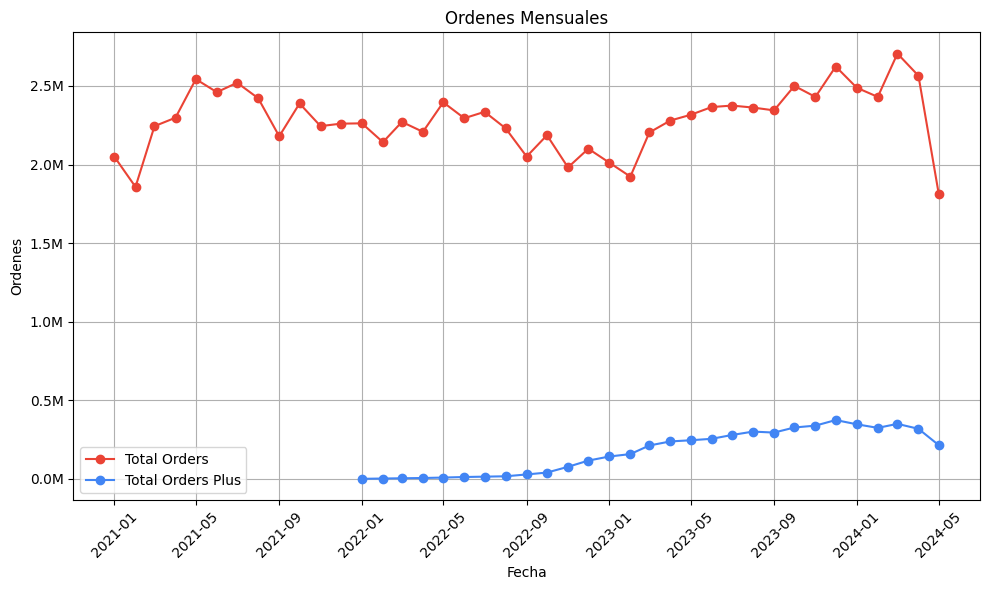

In [ ]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Línea para total_confirmed_orders con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['total_orders'], marker='o', label='Total Orders', color='#ea4335')

# Línea para total_confirmed_orders_plus con el color deseado
plt.plot(monthly_sales['date_month'], monthly_sales['total_orders_plus'], marker='o', label='Total Orders Plus', color='#4285F4')

# Añadir títulos y etiquetas
plt.title('Ordenes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ordenes')
plt.legend()
plt.grid(True)

# Formatear el eje Y en millones y eliminar notación científica
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))


# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Asegúrate de que las columnas 'vertical' y 'zonas' no tengan valores nulos
df['vertical'] = df['vertical'].fillna('Desconocido')
df['zonas'] = df['zonas'].fillna('Desconocido')

# Agrupar por mes, vertical y zonas, y sumar las órdenes totales y las del programa plus.
monthly_sales = df.groupby([df['date_month'].dt.to_period('M'), 'vertical', 'zonas'])[['total_confirmed_order', 'total_confirmed_orders_plus']].sum().reset_index()

# Convertir el periodo de vuelta a fecha
monthly_sales['date_month'] = monthly_sales['date_month'].dt.to_timestamp()

# Renombrar las columnas para mayor claridad
monthly_sales.rename(columns={
    'total_confirmed_order': 'total_orders',
    'total_confirmed_orders_plus': 'total_orders_plus'
}, inplace=True)

# Filtrar los datos para eliminar los valores de total_orders_plus antes de 2022-01 ya que el proyecto comenzo recién en ese periodo.
monthly_sales.loc[monthly_sales['date_month'] < '2022-01-01', 'total_orders_plus'] = np.nan

# Mostrar el resultado filtrado desde 2022-01 para ambos campos
filtered_sales = monthly_sales[monthly_sales['date_month'] >= '2022-01-01']

# Calcular los porcentajes
monthly_totals = filtered_sales.groupby('date_month')['total_orders'].sum().reset_index().rename(columns={'total_orders': 'total_month_orders'})
filtered_sales = filtered_sales.merge(monthly_totals, on='date_month')
filtered_sales['percentage'] = (filtered_sales['total_orders'] / filtered_sales['total_month_orders']) * 100
filtered_sales['percentage'] = filtered_sales['percentage'].round(2)

print(filtered_sales)

    date_month  vertical   zonas  total_orders  total_orders_plus  \
0   2022-01-01     dmart   Norte         12810               16.0   
1   2022-01-01     dmart  Quinta          6126               31.0   
2   2022-01-01     dmart      RM         51386                0.0   
3   2022-01-01     dmart     Sur         42485              111.0   
4   2022-01-01     dmart   other            13                0.0   
..         ...       ...     ...           ...                ...   
425 2024-05-01  non_food   Norte         26418             3427.0   
426 2024-05-01  non_food  Quinta         14664             2265.0   
427 2024-05-01  non_food      RM        103261            11762.0   
428 2024-05-01  non_food     Sur         35787             6110.0   
429 2024-05-01  non_food   other            84                8.0   

     total_month_orders  percentage  
0               2262223        0.57  
1               2262223        0.27  
2               2262223        2.27  
3               226

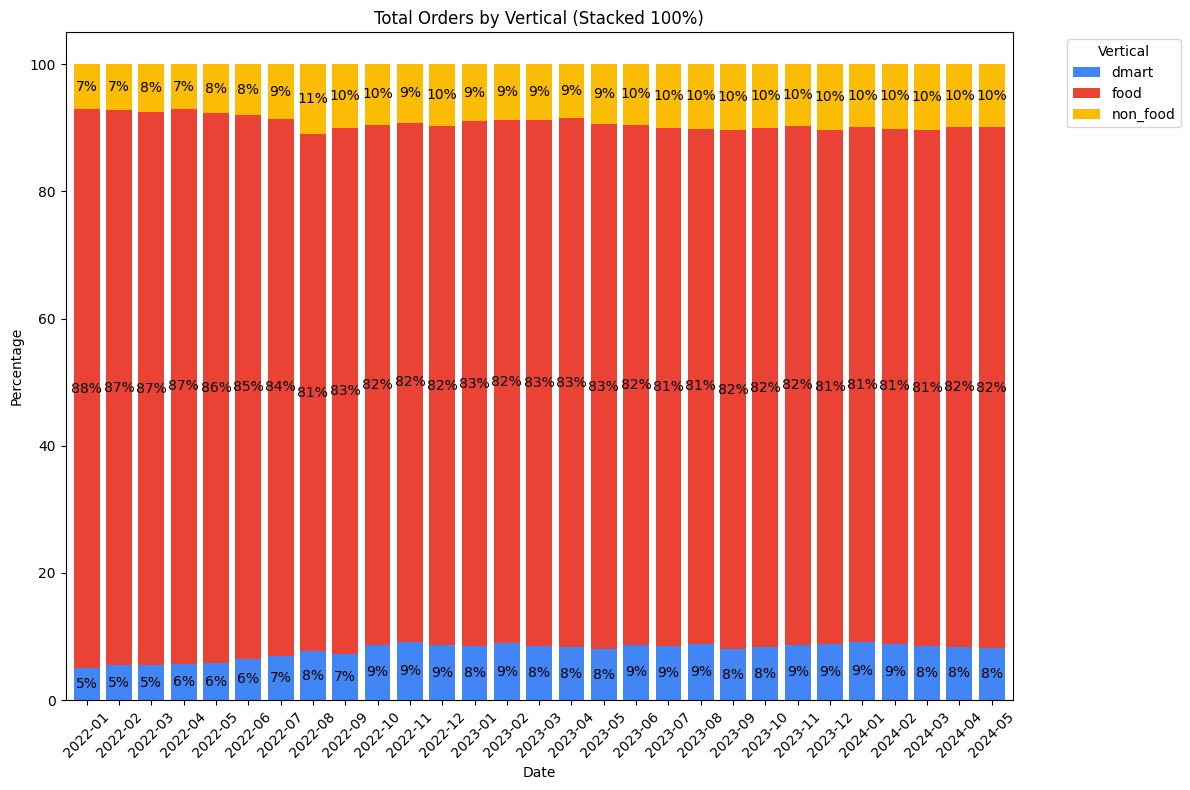

In [ ]:
import matplotlib.pyplot as plt

# Pivotar los datos para tener 'vertical' como columnas
pivot_vertical = filtered_sales.pivot_table(index='date_month', columns='vertical', values='total_orders', aggfunc='sum')

# Normalizar los datos para obtener el porcentaje
pivot_vertical_percentage = pivot_vertical.div(pivot_vertical.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
pivot_vertical_percentage.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax)

# Añadir títulos y etiquetas
plt.title('Total Orders by Vertical (Stacked 100%)')
plt.xlabel('Date')
plt.ylabel('Percentage')

# Formatear el eje X para mostrar solo "yyyy-mm"
ax.set_xticklabels([pd.to_datetime(str(date)).strftime('%Y-%m') for date in pivot_vertical_percentage.index])

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas de datos
for c in ax.containers:
    labels = [f'{v:.0f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Mover la leyenda fuera del gráfico
ax.legend(title='Vertical', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



# Crear la tabla de resumen
table_vertical = filtered_sales.pivot_table(index='date_month', columns='vertical', values=['total_orders', 'percentage'], aggfunc='sum')

# Formatear la tabla
table_vertical_style = table_vertical.style.format(precision=2).set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}])

# Mostrar la tabla de resumen
from IPython.display import display
display(table_vertical_style)

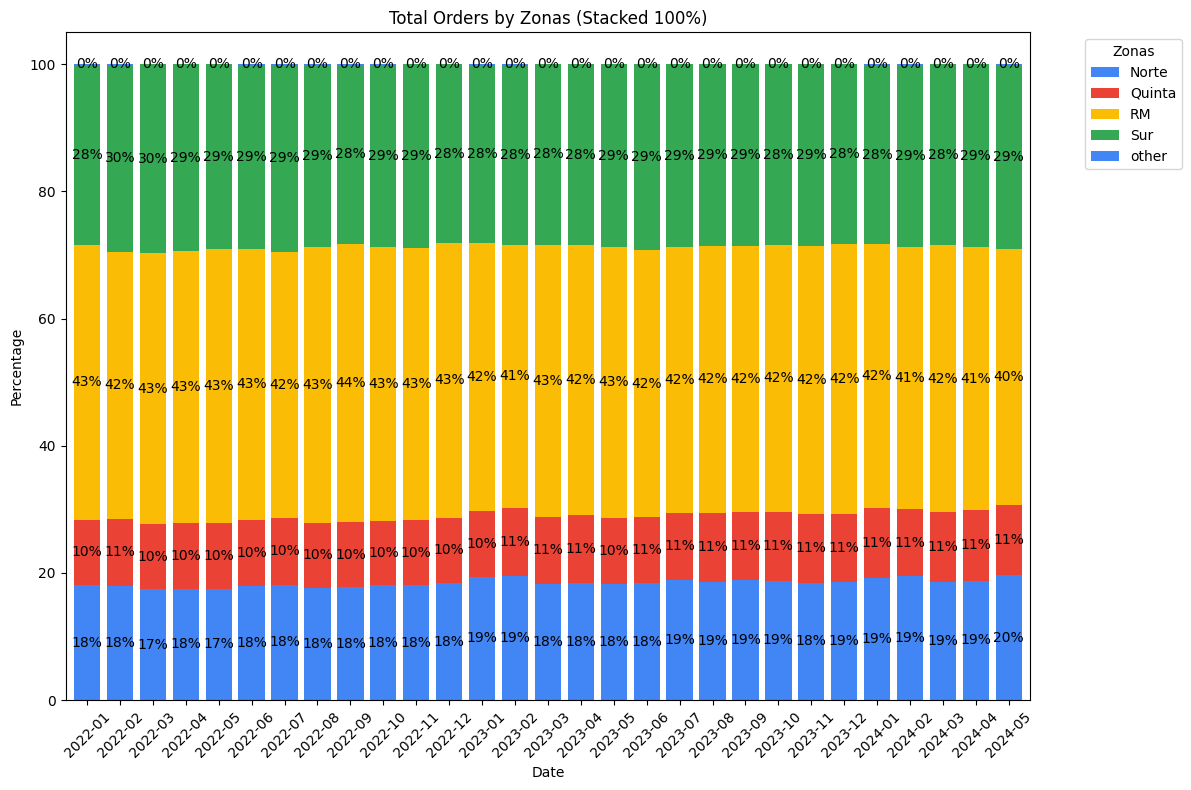

In [ ]:
# Pivotar los datos para tener 'zonas' como columnas
pivot_zonas = filtered_sales.pivot_table(index='date_month', columns='zonas', values='total_orders', aggfunc='sum')

# Normalizar los datos para obtener el porcentaje
pivot_zonas_percentage = pivot_zonas.div(pivot_zonas.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
pivot_zonas_percentage.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax)

# Añadir títulos y etiquetas
plt.title('Total Orders by Zonas (Stacked 100%)')
plt.xlabel('Date')
plt.ylabel('Percentage')

# Formatear el eje X para mostrar solo "yyyy-mm"
ax.set_xticklabels([pd.to_datetime(str(date)).strftime('%Y-%m') for date in pivot_zonas_percentage.index])

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas de datos
for c in ax.containers:
    labels = [f'{v:.0f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Mover la leyenda fuera del gráfico
ax.legend(title='Zonas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


